In [1]:
!pip install pydicom

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.8 MB 5.4 MB/s eta 0:00:01
   --------------- ------------------------ 0.7/1.8 MB 7.1 MB/s eta 0:00:01
   ------------------- -------------------- 0.9/1.8 MB 6.0 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 5.4 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 5.0 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 5.0 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.8 MB 5.0 MB/s eta 0:00:01
   ------------------------- -------------- 1.1/1.8 MB 3.2 MB/s eta 0:00:01
   ------------------------- -------------- 1.1/1.8 MB 3.2 MB/s eta 0:00:01
   ------------------------- -------------- 1.1/1.8 MB 3.2 MB/s eta 0:00:01
   ------------------------------------- -- 1.7/1.8 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 1.8/1.8 MB 3.1 MB/s eta 0:00:00


PYDICOM

In [4]:
import pydicom
import matplotlib.pyplot as plt

dataset=pydicom.dcmread("CT_small.dcm")

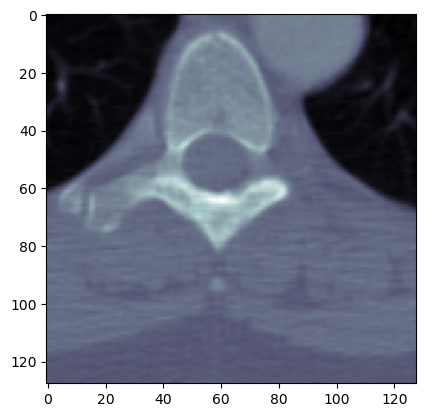

In [10]:
img=dataset.pixel_array
plt.imshow(img,cmap=plt.cm.bone)
plt.imsave("dcm_to_tiff_converted.tiff",img,cmap='gray')

GAUSSIAN

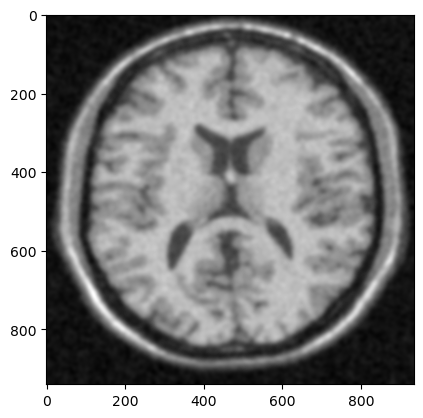

In [9]:
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt

from skimage import io 
from scipy import ndimage as nd

noisy_image=img_as_float(io.imread("MRI_noisy.tif"))
ref_image=img_as_float(io.imread("MRI_clean.tif"))

gaussian_img=nd.gaussian_filter(noisy_image,sigma=5)
plt.imshow(gaussian_img,cmap='gray')
plt.imsave("mri_smothed.tiff",gaussian_img,cmap='gray')

BILATERAL

In [12]:
from skimage.restoration import (denoise_tv_chambolle,denoise_bilateral,denoise_wavelet,estimate_sigma)
denoise_bilateral=denoise_bilateral(noisy_image,sigma_spatial=3)
plt.imsave("mri_bilateral_image.tiff",denoise_bilateral,cmap='gray')


Wavelet

In [14]:
wavelet_smoothed=denoise_wavelet(noisy_image,method='BayesShrink',mode='soft',rescale_sigma=True)
plt.imsave("mri_wavelet_smoothed.tiff",wavelet_smoothed,cmap='gray')

ANISOTROPIC

In [21]:
import matplotlib.pyplot as plt
import cv2
from skimage import io
from medpy.filter.smoothing import anisotropic_diffusion
from skimage import img_as_float



In [22]:
img_aniso_filtered=anisotropic_diffusion(noisy_image,niter=50,kappa=50,gamma=0.2,option=2)
plt.imsave("mri_anoistropic.tiff",img_aniso_filtered,cmap='gray')

BM3D

In [29]:
import matplotlib.pyplot as plt
from skimage import io,img_as_float
# from skimage.metrics import peak_signal_noise_ratio
import bm3d
import numpy as np

In [31]:
bm3d_denoised_image=bm3d.bm3d(noisy_image,sigma_psd=0.2,stage_arg=bm3d.BM3DStages.ALL_STAGES)
plt.imsave("mri_bm3d_image.tiff",bm3d_denoised_image,cmap='gray')